# Monodepth Estimation with DeGirum

This tutorial demonstrates Monocular Depth Estimation with MidasNet in PySDK using OpenVINO. Model information can be found [here](https://docs.openvino.ai/2024/omz_models_model_midasnet.html).

### What is Monodepth?
Monocular Depth Estimation is the task of estimating scene depth using a single image. It has many potential applications in robotics, 3D reconstruction, medical imaging and autonomous systems. This tutorial uses a neural network model called [MiDaS](https://github.com/intel-isl/MiDaS), which was developed by the [Embodied AI Foundation](https://www.embodiedaifoundation.org/). See the research paper below to learn more.

R. Ranftl, K. Lasinger, D. Hafner, K. Schindler and V. Koltun, ["Towards Robust Monocular Depth Estimation: Mixing Datasets for Zero-shot Cross-dataset Transfer,"](https://ieeexplore.ieee.org/document/9178977) in IEEE Transactions on Pattern Analysis and Machine Intelligence, doi: `10.1109/TPAMI.2020.3019967`.

### Install requirements

In [1]:
# make sure PySDK and degirum-tools is installed
!pip show degirum || pip install degirum
!pip show degirum-tools || pip install degirum-tools

Name: degirum
Version: 0.12.0
Summary: DeGirum AI Inference Software Package
Home-page: https://github.com/degirum
Author: DeGirum Corp.
Author-email: support@degirum.com
License: 
Location: /home/mehrdad/.local/lib/python3.10/site-packages
Requires: msgpack, msgpack-numpy, numpy, opencv-python, pillow, python-socketio, pyyaml, requests, types-PyYAML, types-requests, websocket-client
Required-by: degirum-tools
Name: degirum-tools
Version: 0.5.2
Summary: Tools for PySDK
Home-page: UNKNOWN
Author: DeGirum
Author-email: 
License: UNKNOWN
Location: /usr/local/lib/python3.10/dist-packages
Requires: degirum, ffmpegcv, ipython, numpy, opencv-python, pafy, pillow, psutil, pycocotools, pyyaml, requests, scipy, youtube-dl
Required-by: 


### Imports

In [2]:
import degirum as dg
import degirum_tools as dgtools
from PIL import Image

from depth_postprocessor import DepthResults

## Monodepth on an Image

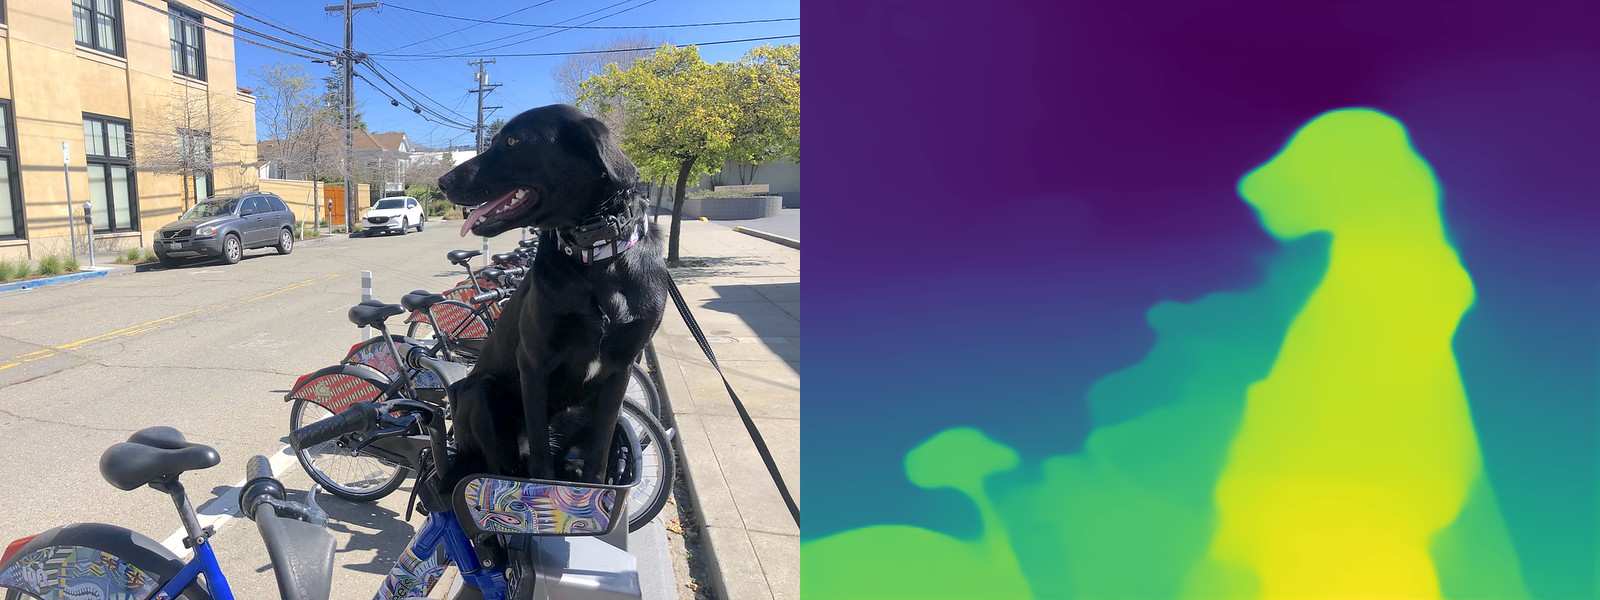

In [3]:
hw_location = dg.CLOUD
model_name = 'resnext101_midas_depth--256x256_float_openvino_cpu_1'
model_zoo_url = 'https://cs.degirum.com/degirum/monocular_depth'

image_url = "https://storage.openvinotoolkit.org/repositories/openvino_notebooks/data/data/image/coco_bike.jpg"

zoo = dg.connect(hw_location, model_zoo_url, dgtools.get_token())
model = zoo.load_model(model_name, image_backend="pil")    # use PIL as image backend to show results in-cell
model.custom_postprocessor = DepthResults

results = model(image_url)

# Place image and depth map side by side
compound_image = Image.new('RGB', (results.image.size[0] * 2, results.image.size[1]))
compound_image.paste(results.image)
compound_image.paste(results.image_overlay, (results.image.size[0], 0))
compound_image


## Monodepth on a Video

Successfully opened video stream 'https://storage.openvinotoolkit.org/repositories/openvino_notebooks/data/data/video/Coco%20Walking%20in%20Berkeley.mp4'


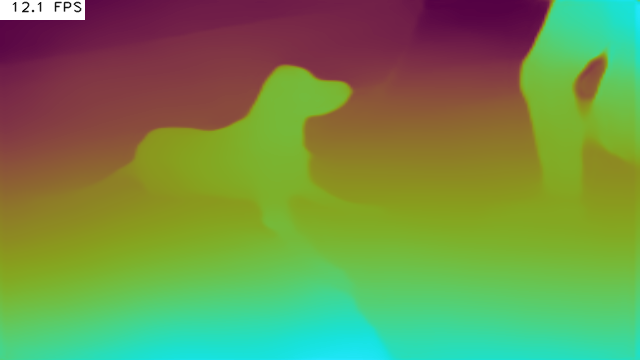

In [4]:
# Video source: https://www.youtube.com/watch?v=fu1xcQdJRws (Public Domain)
video_source = "https://storage.openvinotoolkit.org/repositories/openvino_notebooks/data/data/video/Coco%20Walking%20in%20Berkeley.mp4"

zoo = dg.connect(hw_location, model_zoo_url, dgtools.get_token())
model = zoo.load_model(model_name)
model.custom_postprocessor = DepthResults

with dgtools.Display("AI Camera") as display:
    # AI prediction loop
    # Press 'x' or 'q' to stop
    # Drag zone by left mouse button to move zone
    # Drag zone corners by right mouse button to adjust zone shape
    for inference_result in dgtools.predict_stream(
        model, video_source
    ):
        display.show(inference_result)